# Homework 5 #
Tianhao Jiang

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import statistics
import h5py
import warnings
import xarray as xr
from scipy import stats
from scipy.optimize import curve_fit

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

## Problem 1 ##

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  σ , say in the range 2-5. Create a million background events.

I chose a zero-mean gaussian with $\sigma=2$ as the background.

In [2]:
data_size = 1000000
signal_size = 5
bkgd = np.random.normal(0,2,data_size)
signal = np.random.uniform(0,20,data_size)

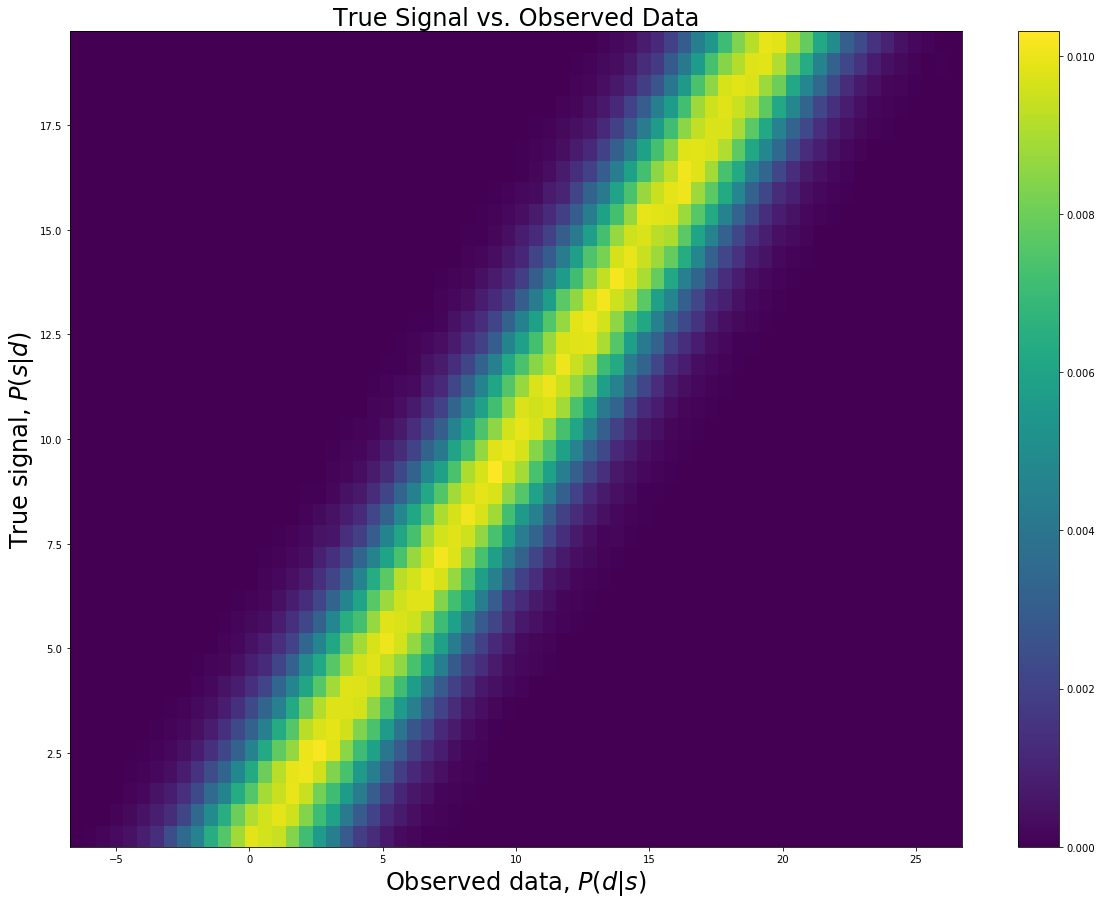

In [3]:
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

fig, ax = plt.subplots(1, 1)
Psd,xedges,yedges = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
h1=ax.pcolormesh(datacenters,signalcenters,Psd.T)
fig.colorbar(h1)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('True Signal vs. Observed Data', fontsize = 24)
plt.show()

### Problem 1b ###

**Select a true injected signal and plot  P(d|s) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.**

I selected a true injected signal of 8.

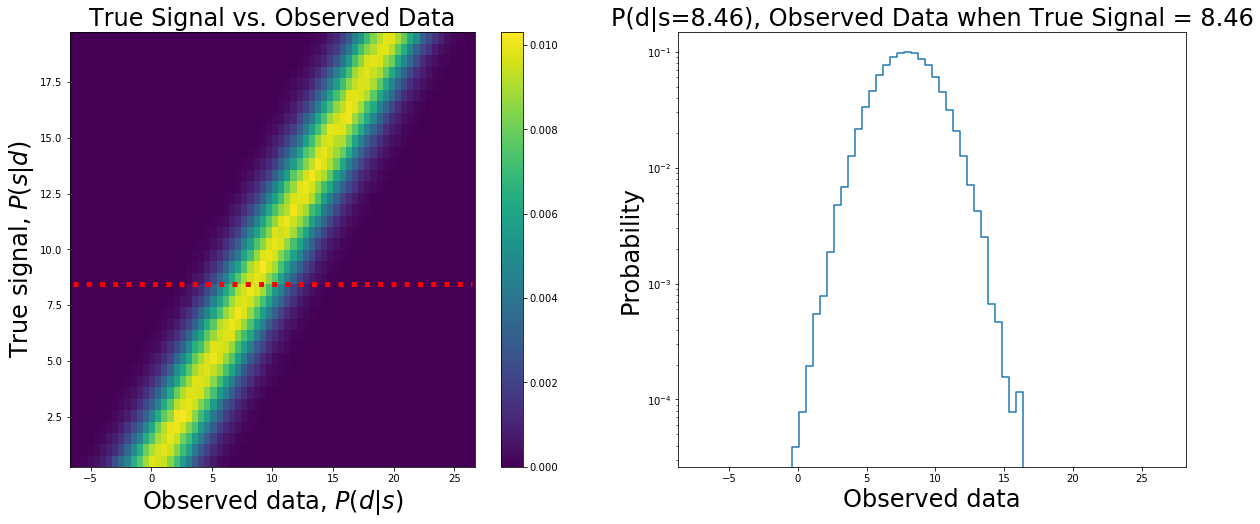

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
Psd,xedges,yedges = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
h1=ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
fig.colorbar(h1,ax=ax[0])
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].set_title('True Signal vs. Observed Data', fontsize = 24)
y = 8
for index in range(0,len(yedges)):
    if yedges[index] >= y:
        break
y = (yedges[index]+yedges[index+1])/2
ax[0].plot([xedges[1],xedges[len(xedges)-2]],[y,y],'r:',linewidth=5)
observed_data = Psd[:,index] / sum(Psd[:,index]) # normalize the histogram
ax[1].step(xedges[0:len(xedges)-1],observed_data)
ax[1].set_yscale('log')
ax[1].set_ylabel('Probability', fontsize = 24)
ax[1].set_xlabel('Observed data', fontsize = 24)
ax[1].set_title('P(d|s=%.2f), Observed Data when True Signal = %.2f' % (y,y), fontsize = 24)
plt.show()

The resulting plot is on the right. The plot is a histogram of the observed signal values (data) if I performed the same masurement many times on a true signal = 8.46.

This plot is a slice of the 2D histogram of True Signal vs Observed Data as shown by the plot on the left.  

### Problem 1c ###
**Select an observed data value and plot  P(s|d) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.**

I selected an observed data value of 10.

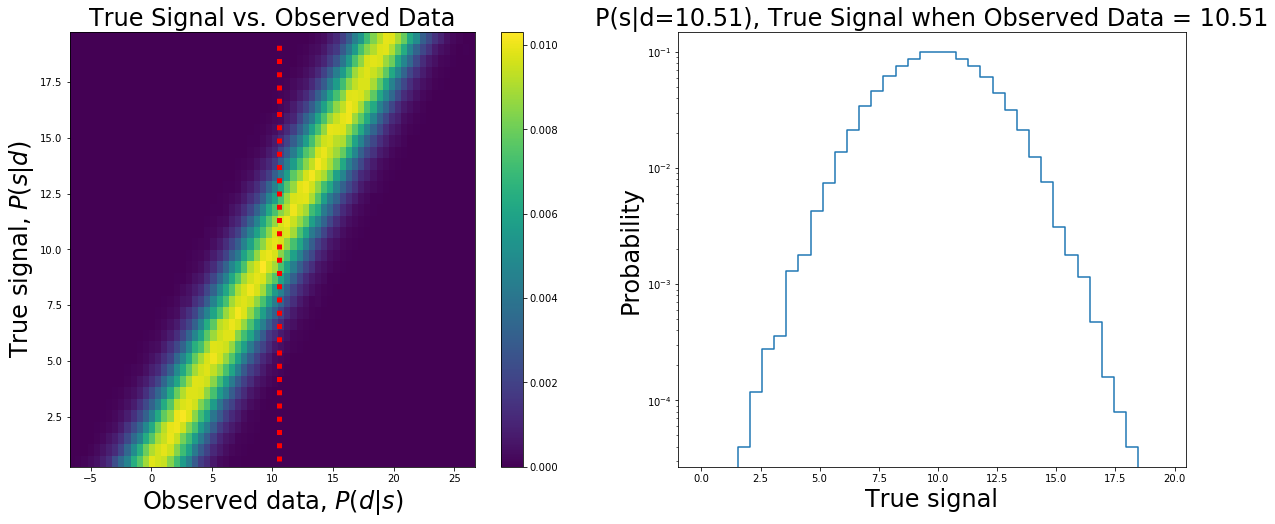

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
Psd,xedges,yedges = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
h1=ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
fig.colorbar(h1,ax=ax[0])
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].set_title('True Signal vs. Observed Data', fontsize = 24)
x = 10
for index in range(0,len(xedges)):
    if xedges[index] >= x:
        break
x = (xedges[index]+xedges[index+1])/2
ax[0].plot([x,x],[yedges[1],yedges[len(yedges)-2]],'r:',linewidth=5)
true_signal = Psd[index,:] / sum(Psd[index,:]) # normalize the histogram
ax[1].step(yedges[0:len(yedges)-1],true_signal)
ax[1].set_yscale('log')
ax[1].set_ylabel('Probability', fontsize = 24)
ax[1].set_xlabel('True signal', fontsize = 24)
ax[1].set_title('P(s|d=%.2f), True Signal when Observed Data = %.2f' % (x,x), fontsize = 24)
plt.show()

The resulting plot is on the right. The plot is a histogram of the (approximate) probability of the true signal strengths if I measure a signal to be 10.51.

This plot is a slice of the 2D histogram of True Signal vs Observed Data as shown by the plot on the left.  

## Problem 2 ##
**Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  σ ]. Reproduce the graphs above.**

I chose a gaussian with $\sigma=2$ and mean = 6 as the background.

In [6]:
data_size = 1000000
signal_size = 5
bkgd = np.random.normal(6,2,data_size)
signal = np.random.uniform(0,20,data_size)

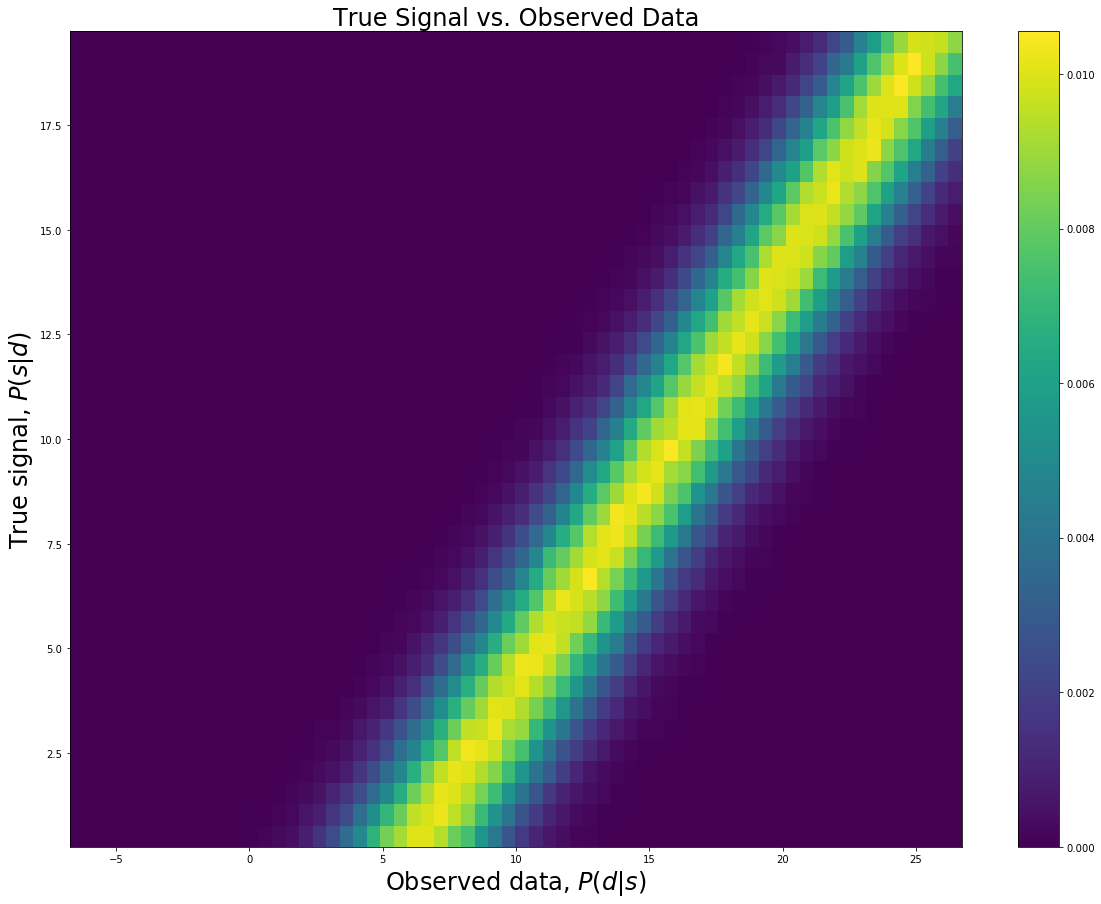

In [7]:
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

fig, ax = plt.subplots(1, 1)
Psd,xedges,yedges = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
h1=ax.pcolormesh(datacenters,signalcenters,Psd.T)
fig.colorbar(h1)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('True Signal vs. Observed Data', fontsize = 24)
plt.show()

### Problem 2b ###

**Select a true injected signal and plot  P(d|s) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.**

I selected a true injected signal of 10.

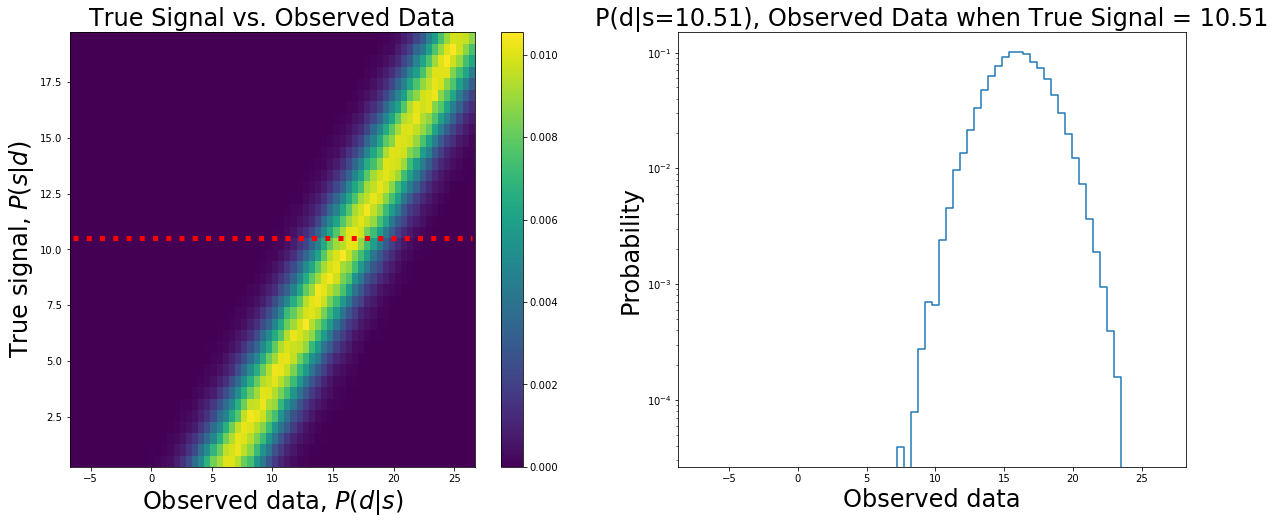

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
Psd,xedges,yedges = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
h1=ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
fig.colorbar(h1,ax=ax[0])
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].set_title('True Signal vs. Observed Data', fontsize = 24)
y = 10
for index in range(0,len(yedges)):
    if yedges[index] >= y:
        break
y = (yedges[index]+yedges[index+1])/2
ax[0].plot([xedges[1],xedges[len(xedges)-2]],[y,y],'r:',linewidth=5)
observed_data = Psd[:,index] / sum(Psd[:,index]) # normalize the histogram
ax[1].step(xedges[0:len(xedges)-1],observed_data)
ax[1].set_yscale('log')
ax[1].set_ylabel('Probability', fontsize = 24)
ax[1].set_xlabel('Observed data', fontsize = 24)
ax[1].set_title('P(d|s=%.2f), Observed Data when True Signal = %.2f' % (y,y), fontsize = 24)
plt.show()

The resulting plot is on the right. The plot is a histogram of the observed signal values (data) if I performed the same masurement many times on a true signal = 10.51.

This plot is a slice of the 2D histogram of True Signal vs Observed Data as shown by the plot on the left.  

### Problem 2c ###
**Select an observed data value and plot  P(s|d) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.**

I selected an observed data value of 10.

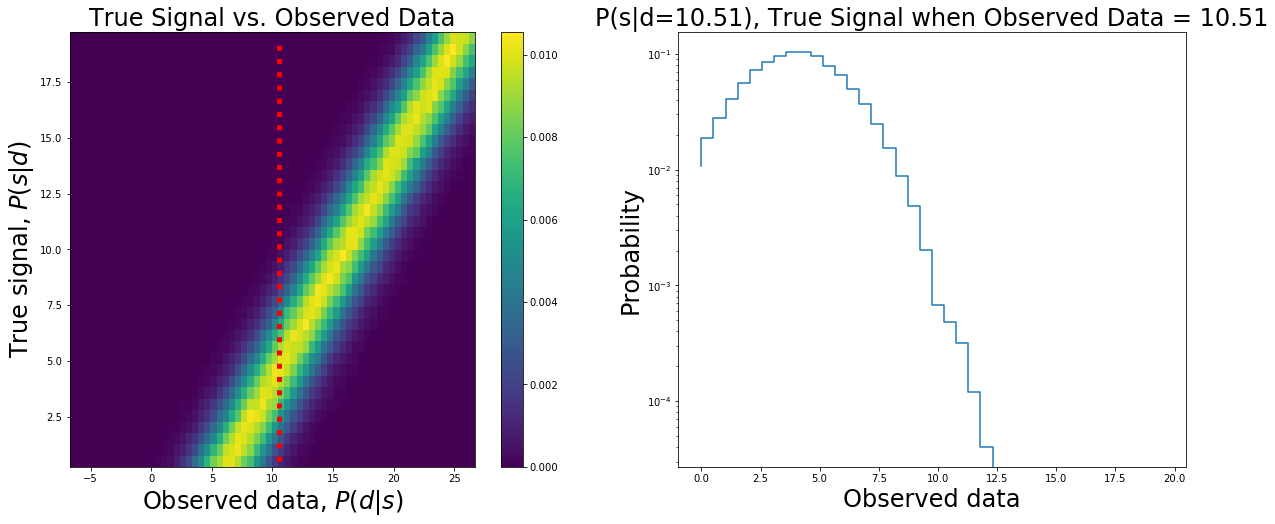

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
Psd,xedges,yedges = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
h1=ax[0].pcolormesh(datacenters,signalcenters,Psd.T)
fig.colorbar(h1,ax=ax[0])
ax[0].set_ylabel('True signal, $P(s|d)$', fontsize = 24)
ax[0].set_xlabel('Observed data, $P(d|s)$', fontsize = 24)
ax[0].set_title('True Signal vs. Observed Data', fontsize = 24)
x = 10
for index in range(0,len(xedges)):
    if xedges[index] >= x:
        break
x = (xedges[index]+xedges[index+1])/2
ax[0].plot([x,x],[yedges[1],yedges[len(yedges)-2]],'r:',linewidth=5)
true_signal = Psd[index,:] / sum(Psd[index,:]) # normalize the histogram
ax[1].step(yedges[0:len(yedges)-1],true_signal)
ax[1].set_yscale('log')
ax[1].set_ylabel('Probability', fontsize = 24)
ax[1].set_xlabel('Observed data', fontsize = 24)
ax[1].set_title('P(s|d=%.2f), True Signal when Observed Data = %.2f' % (y,y), fontsize = 24)
plt.show()

The resulting plot is on the right. The plot is a histogram of the (approximate) probability of the true signal strengths if I measure a signal to be 10.51.

This plot is a slice of the 2D histogram of True Signal vs Observed Data as shown by the plot on the left.


**Lastly overplot the  P(d|s)  and  P(s|d)  plots. Why are they not centered on the same value? Explain carefully.**\

I also plotted the background for reference.

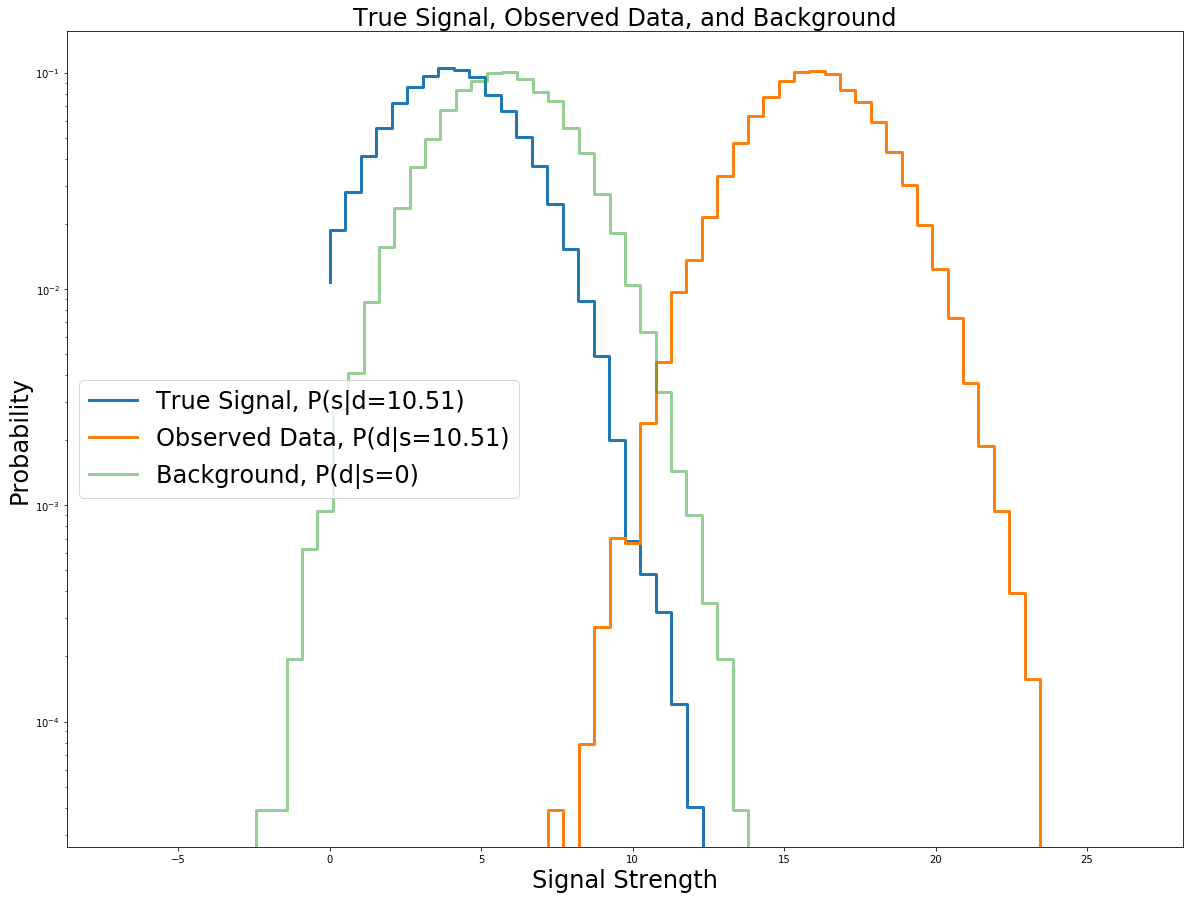

In [10]:
fig, ax = plt.subplots()
ax.step(yedges[0:len(yedges)-1],true_signal,label='True Signal, P(s|d=10.51)',linewidth=3)
ax.step(xedges[0:len(xedges)-1],observed_data,label='Observed Data, P(d|s=10.51)',linewidth=3)
ax.step(xedges[0:len(xedges)-1],Psd[:,0] / sum(Psd[:,0]),label='Background, P(d|s=0)',linewidth=3,alpha=0.5)
ax.set_yscale('log')
ax.set_ylabel('Probability', fontsize = 24)
ax.set_xlabel('Signal Strength', fontsize = 24)
ax.set_title('True Signal, Observed Data, and Background', fontsize = 24)
plt.legend(fontsize = 24)
plt.show()

The P(d|s)  and  P(s|d)  plots are not centered on the same value because the background doesn't have a zero-mean.

We are comparing f(x) = P(data=x|signal=10) and g(x) = P(signal=x|data=10).

We know that data = signal + background, so 
f(x) = P(background=x-10), g(x) = P(background=10-x)

We also know the background is symmetric around x=6, thus g(x) = P(background=6-(10-x-6)) = P(background=x+2).

To varify P(data=x|signal=10)=P(background=x-10) and P(signal=x|data=10)=P(background=x+2), we can look at the plot and see that the observed data looks like the background shifted 10 units to the right and the true signal looks like the background shifted 2 units to the left.


